# Python API examples


## Creates

- createUser
- createMarket
- createTrade

### Create user

Creates a new user. Returns signature and verify keys.

~~~~
import requests
url = 'https://blocmarket.herokuapp.com/createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example return as json:

~~~~
{'signingKey': '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477',
 'traderId': '1',
 'verifyKey': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}
~~~~
        
### Create/update market

Creates/updates a market. Returns True and market details if successful. 

Specify:
- Market root and branch id
- Minimum and maximum outcomes
- Trader Id
- Sign and verify keys

Note that sending the private key is a terrible idea. In production signing is done on client side.

~~~~
sk = '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477'
vk = 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'
tId = 2

url = 'https://blocmarket.herokuapp.com/createMarket'
headers = {'content-type': 'application/json'}
content_makemarket = {"signingKey": sk,
                    "traderId": tId, 
                    "verifyKey": vk,
                    "marketRootId": 1, 
                    "marketBranchId": 1, 
                    "marketMin": 0,
                    "marketMax":1}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
~~~~

Example return as json:

~~~~
 {'allChecks': 
     "{'marketId': '1', 'marketRangeChk': True,
     'sigChk': True, 'chainChk': True, 
     'ownerChk': True, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0,
 'marketMin': 1,
 'marketRootId': 1,
 'traderId': 2}
~~~~
    
### Create trade

Create a trade. Returns True and trade details if successful.

Specify:

- Trader Id
- Market Id
- Price
- Quantity
- Sign and verify keys

~~~~
url = 'https://blocmarket.herokuapp.com/createTrade'
headers = {'content-type': 'application/json'}
content_maketrade = {"signingKey": sk,
                     "traderId": int(tId),
                     "verifyKey": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)



~~~~

Example return as json:
~~~~


{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': 1,
 'traderId': 1}
~~~~

## Views

- viewMarketBounds
- viewOrderBook
- viewOpenTrades
- viewMatchedTrades

### View markets

~~~~
url = 'https://blocmarket.herokuapp.com/viewMarketBounds'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":2,"2":3,"3":4},
"marketRootId":{"0":1,"1":2,"2":3,"3":4},
"marketBranchId":{"0":1,"1":1,"2":1,"3":1},
"marketMin":{"0":0.0,"1":0.0,"2":0.0,"3":0.0},
"marketMax":{"0":0.7,"1":0.7,"2":0.7,"3":0.7}}'
~~~~

### View full order book

~~~~
url = 'https://blocmarket.herokuapp.com/viewOrderBook'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1,"2":1},"price":{"0":0.55,"1":0.55,"2":0.55},
"quantity":{"0":1.0,"1":-1.0,"2":-1.0},"traderId":{"0":1,"1":1,"2":1},
"iMatched":{"0":true,"1":true,"2":true},
"timeStampUTC":{"0":1547976585838,"1":1547976602766,"2":1547976613155}}'
~~~~

Using a stream is only necessary if the order book is large and the request is truncated by the server, but it doesn't do any harm.

### View open trades

~~~~
url = 'https://https://blocmarket.herokuapp.com/viewOpenTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
~~~~

~~~~
'{"marketId":{"12":1,"15":1,"18":1,"21":1,"24":1},
"price":{"12":0.43,"15":0.43,"18":0.43,"21":0.43,"24":0.43},
"quantity":{"12":-1.0,"15":-1.0,"18":-1.0,"21":-1.0,"24":-1.0},
"traderId":{"12":1,"15":1,"18":1,"21":1,"24":1},"timeStampUTC":
{"12":1547976742476,"15":1547976750344,"18":1547976758683,"21":1547976768968,"24":1547976775537}}'
~~~~

### View matched trades

~~~~
url = 'https://blocmarket.herokuapp.com/viewMatchedTrades'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.43,"1":0.55},"quantity":{"0":0.0,"1":0.0},"traderId":{"0":1,"1":1}}'

~~~~

### View trader summary

A view joining order book and marketTable for a particular trader.

~~~~
url = 'https://blocmarket.herokuapp.com/viewTradeSummary'
headers = {'content-type': 'application/json'}
content = {'traderId': 2}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.8,"1":0.5},
"quantity":{"0":-1.0,"1":-1.0},"traderId":{"0":2,"1":2},
"iMatched":{"0":false,"1":true},
"timeStampUTC":{"0":1547982939316,"1":1547982938964},
"marketMin":{"0":0.0,"1":0.0},"marketMax":{"0":1.0,"1":1.0}}'
~~~~


# Python demonstration

In [457]:
import requests
import json
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt

# Running flask app from powershell
# $env:FLASK_APP = "api"
# $env:FLASK_ENV = "development"
# flask run

# Running flask from terminal on OSX
# export FLASK_APP=api
# export FLASK_ENV=development
# flask run

# Running with gunicorn (heroku, digitalocean, etc):
# Procfile >
# web: gunicorn wsgi --log-file -
# wsgi.py >
# from api import app as application
#
#if __name__ == "__main__":
#    application.run()

# https://devcenter.heroku.com/articles/getting-started-with-python
# https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-14-04


In [511]:
baseurl = 'https://blocmarket.herokuapp.com/'
#baseurl = 'http://127.0.0.1:5000/'
#baseurl = 'http://127.0.0.1:7000/'

In [512]:
# Create a new user
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [513]:
# View response as json
response.json()

{'signingKey': '5c67af339cee4038c8e93088927027ccd8449dac7e3fa2e2c079102240517605',
 'traderId': '3',
 'verifyKey': '4e73e90bf045c0b75fcc09ab704d2ce47cf0685d4c691ea99ad33392b7eeec35'}

In [514]:
# Create a new market
url = baseurl + 'createMarket'

mkRtId = 7
mkId=1
# Copy keys and traderid from response
sk = response.json()['signingKey']
vk = response.json()['verifyKey']
tId = response.json()['traderId']

content_makemarket = {"signingKey": sk,
                    "traderId": int(tId), 
                    "verifyKey": vk,
                    "marketRootId": mkRtId, 
                    "marketBranchId": 1, 
                    "marketMin": 0.1,
                    "marketMax":0.9}
# Post market
response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)


In [515]:
# View response as json
response.json()

{'allChecks': "{'marketId': '1', 'marketRangeChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': False, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0.9,
 'marketMin': 0.1,
 'marketRootId': 7,
 'traderId': 3}

In [516]:
# Save market id from response
mkId = response.json()['marketId']

In [517]:
# Create a trade
url = baseurl+'createTrade'

content_maketrade = {"signingKey": sk,
                     "traderId": int(tId),
                     "verifyKey": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [518]:
# View response as json
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': 1,
 'traderId': 3}

In [519]:
# View response as a dataframe
pd.DataFrame(response.json(), index=[0])


,allChecks,checks,marketId,price,quantity,traderId
0,"{'marketChk': True, 'sigChk': True, 'chainChk'...",True,1,0.55,1,3


In [520]:
# Create a matched trade
url = baseurl+'createTrade'
content_maketrade['quantity'] = -1
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [521]:
# View
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': -1,
 'traderId': 3}

In [522]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 3.7659921646118164 seconds.
matched trade: 1 in 5.130906105041504 seconds.
matched trade: 2 in 4.799885034561157 seconds.
matched trade: 3 in 4.268385171890259 seconds.
matched trade: 4 in 3.238713026046753 seconds.


In [523]:
# Create many markets
url = baseurl+'createMarket'

for i in range(4):
    t = time.time()

    content_makemarket = {"signingKey": sk,
      "traderId": int(tId), "verifyKey": vk,
      "marketRootId": i+1, "marketBranchId": 1, "marketMin": 0, "marketMax":0.7}

    response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
    if response.json()['checks'] == 'True':
        print('market created: ' + str(i+1) + ' in ' + str(time.time() - t) + ' seconds.')
    else:
        print('failed to create market ' +str(i+1))
    

failed to create market 1
failed to create market 2
failed to create market 3
failed to create market 4


In [524]:
response.json()

{'allChecks': "{'marketId': '5', 'marketRangeChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': False, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 5,
 'marketMax': 0.7,
 'marketMin': 0,
 'marketRootId': 4,
 'traderId': 3}

In [525]:
# View maximum and minimum of each market
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)


In [526]:
pd.read_json(response.json())


,marketId,marketRootId,marketBranchId,marketMin,marketMax
0,1,7,1,0.10,0.9
1,2,1,1,0.00,0.7
2,3,2,1,0.00,0.7
3,4,3,1,0.00,0.7
4,5,4,1,0.00,0.7
5,6,1,3,0.01,0.7


In [527]:
# View whole order book
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)

In [528]:
pd.read_json(response.json())


,marketId,price,quantity,traderId,iMatched,timeStampUTC
0,1,0.550000,1,1,True,2019-01-29 11:12:56.002
1,1,0.550000,-1,1,True,2019-01-29 11:12:57.399
10,1,0.550000,-1,1,True,2019-01-29 11:13:09.934
100,1,0.582167,-1,1,True,2019-01-29 11:15:53.574
1000,1,0.980000,-1,1,True,2019-01-29 11:38:43.354
10000,1,0.980000,1,1,True,2019-01-29 23:26:55.736
10001,1,0.980000,-1,1,True,2019-01-29 23:27:00.021
10002,1,1.000000,-1,1,True,2019-01-29 23:26:57.952
10003,1,1.000000,1,1,True,2019-01-29 23:27:01.509
10004,1,0.980000,1,1,True,2019-01-29 23:27:02.992


In [529]:
# Create many unmatched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    content_maketrade['price'] = 0.43
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('unmatched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


unmatched trade: 0 in 1.7751529216766357 seconds.
unmatched trade: 1 in 1.8552660942077637 seconds.
unmatched trade: 2 in 1.978632926940918 seconds.
unmatched trade: 3 in 1.6917381286621094 seconds.
unmatched trade: 4 in 1.8516302108764648 seconds.


In [530]:
a = response.json()
a

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.43,
 'quantity': -1,
 'traderId': 3}

In [531]:
# View all open (unmatched trades)
url = baseurl+'viewOpenTrades'

content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [532]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,timeStampUTC
12,1,0.430000,-1,1,2019-01-29 11:13:39.452
15,1,0.430000,-1,1,2019-01-29 11:13:42.106
17132,1,0.510000,1,2,2019-01-30 07:11:32.372
17143,1,0.980000,1,1,2019-01-30 08:50:00.685
17156,1,0.430000,-1,3,2019-01-30 09:05:03.223
17157,1,0.430000,-1,3,2019-01-30 09:05:05.056
17158,1,0.430000,-1,3,2019-01-30 09:05:07.037
17159,1,0.430000,-1,3,2019-01-30 09:05:08.698
17160,1,0.430000,-1,3,2019-01-30 09:05:10.613
18,1,0.430000,-1,1,2019-01-29 11:13:44.709


In [540]:
# View matched trades (summed over marketId/price/traderId)
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)

In [541]:
response.text

'"{\\"marketId\\":{\\"0\\":1,\\"1\\":1,\\"2\\":1,\\"3\\":1,\\"4\\":1,\\"5\\":1,\\"6\\":1,\\"7\\":1,\\"8\\":1,\\"9\\":1,\\"10\\":1,\\"11\\":1,\\"12\\":1,\\"13\\":1,\\"14\\":1,\\"15\\":1,\\"16\\":1,\\"17\\":1,\\"18\\":1,\\"19\\":1,\\"20\\":1,\\"21\\":1,\\"22\\":1,\\"23\\":1,\\"24\\":1,\\"25\\":1,\\"26\\":1,\\"27\\":1,\\"28\\":1,\\"29\\":1,\\"30\\":1,\\"31\\":1,\\"32\\":1,\\"33\\":1,\\"34\\":1,\\"35\\":1,\\"36\\":1,\\"37\\":1,\\"38\\":1,\\"39\\":1,\\"40\\":1,\\"41\\":1,\\"42\\":1,\\"43\\":1,\\"44\\":1,\\"45\\":1,\\"46\\":1,\\"47\\":1,\\"48\\":1,\\"49\\":1,\\"50\\":1,\\"51\\":1,\\"52\\":1,\\"53\\":1,\\"54\\":1,\\"55\\":1,\\"56\\":1,\\"57\\":1,\\"58\\":1,\\"59\\":1,\\"60\\":1,\\"61\\":1,\\"62\\":1,\\"63\\":1,\\"64\\":1,\\"65\\":1,\\"66\\":1,\\"67\\":1,\\"68\\":1,\\"69\\":1,\\"70\\":1,\\"71\\":1,\\"72\\":1,\\"73\\":1,\\"74\\":1,\\"75\\":1,\\"76\\":1,\\"77\\":1,\\"78\\":1,\\"79\\":1,\\"80\\":1,\\"81\\":1,\\"82\\":1,\\"83\\":1,\\"84\\":1,\\"85\\":1,\\"86\\":1,\\"87\\":1,\\"88\\":1,\\"89\\":1,\

In [542]:
pd.read_json(response.json())

,marketId,price,quantity,traderId
0,1,0.430000,0,1
1,1,0.483225,0,1
10,1,0.510347,0,1
100,1,0.640383,0,1
1000,1,0.968687,0,1
1001,1,0.968712,0,1
1002,1,0.968717,0,1
1003,1,0.968733,0,1
1004,1,0.968770,0,1
1005,1,0.968785,0,1


In [483]:
# Create many matched trades (own)
url = baseurl+'createTrade'

for i in range(5): 
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 2.662303924560547 seconds.
matched trade: 1 in 2.6403000354766846 seconds.
matched trade: 2 in 2.537871837615967 seconds.
matched trade: 3 in 2.636120080947876 seconds.
matched trade: 4 in 2.8368451595306396 seconds.


In [484]:
# View summary of trader for a particular trader
url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)

In [485]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.55,1,1,True,2019-01-29 11:12:56.002,0.1,0.9,-0.45,0.35
1,1,0.55,-1,1,True,2019-01-29 11:12:57.399,0.1,0.9,0.45,-0.35
10,1,0.55,-1,1,True,2019-01-29 11:13:09.934,0.1,0.9,0.45,-0.35
11,1,0.55,1,1,True,2019-01-29 11:13:11.266,0.1,0.9,-0.45,0.35
12,1,0.43,-1,1,False,2019-01-29 11:13:39.452,0.1,0.9,0.33,-0.47
13,1,0.43,-1,1,True,2019-01-29 11:13:27.354,0.1,0.9,0.33,-0.47
14,1,0.43,1,1,True,2019-01-29 11:13:40.736,0.1,0.9,-0.33,0.47
15,1,0.43,-1,1,False,2019-01-29 11:13:42.106,0.1,0.9,0.33,-0.47
16,1,0.43,-1,1,True,2019-01-29 11:13:28.999,0.1,0.9,0.33,-0.47
17,1,0.43,1,1,True,2019-01-29 11:13:43.446,0.1,0.9,-0.33,0.47


In [486]:
# Get a signed UTC timestamp
url = baseurl+'getSignedUTCTimestamp'
content = {}
response = requests.get(url, data=json.dumps(content), headers=headers)


In [487]:
response.json()

{'timeStampUTC': '2019-01-29 11:13:54.039565',
 'timeStampUTCSignature': 'b"o\\xf9\\xec\\x93\\xed)V\\x1fh\\x16\\xf0f\\x80,\\x1cK\\xcf\\xe8\\xfeu\\x8e\\xca\\x19^\\x92\\xe5\\xeeqZ\\xfe\\xaf\\xffCm\\xfd\\xb5/@\\xc9J\\x95>\\\\\\x9c\\x1c\\x87\\xf7\\xad3fS\\xb5\\xeaO/q\\x93\\x8a\\xbe\'\\x169]\\t"',
 'verifyKey': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}

In [546]:
# A simple robot making a bid/offer with an OU process

url = baseurl+'createTrade'

m = 0.5
k = 0.1
v = 0.001
B = m

for i in range(20000):
    # Create bounded [0,1] random reverting to m
    dW = np.random.normal()
    if i==0:
        dLnB = v*dW
    else:
        dLnB = -k*(np.log(B)-m) + v*dW
    
    # Bound between zero and one
    B *= np.exp(dLnB)
    B = min(max(B, 0.01),0.99)
    
    # Make a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Make an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    time.sleep(0.1)
    
    # Remove bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =-1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Remove offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = 1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('Price for iteration ' + str(i) + ' : ' + str(content_maketrade['price']))

Price for iteration 0 : 0.5093691260050373
Price for iteration 1 : 0.573024956437909
Price for iteration 2 : 0.6368651641054949
Price for iteration 3 : 0.699728033782746
Price for iteration 4 : 0.7620141106929669


KeyboardInterrupt: 

0.813285806311503

In [509]:
# Get summary for this market and plot

url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
a = pd.read_json(response.json())
a = a[a['marketId'] == mkId]
a = a.set_index(a['timeStampUTC'])


Text(0.5, 1.0, 'Time series for market 1 / trader 1')

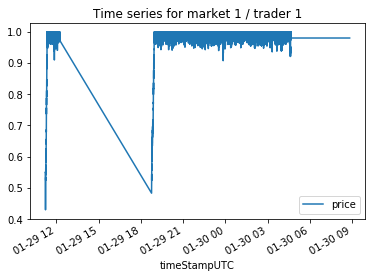

In [510]:
plt.figure(); a['price'].plot(); plt.legend(loc='best'); plt.title('Time series for market ' + str(mkId) + ' / trader ' +str(tId))


# Curl API examples



## Create user

~~~~
curl --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createUser
~~~~
        
## Create market

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketRootId": 1, 
"marketBranchId": 5, 
"marketMin": 0, 
"marketMax": 1}' 
--header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createMarket
~~~~
    
## Create trade

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketId": 1,
"price": 0.1212,
"quantity": 1}' --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createTrade

~~~~
        
## View order book (output to file)

~~~~
curl --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/viewOrderBook --output ob.txt
~~~~    
        
Also can load json from file with something like 
~~~~ 
curl -d "@data.json" -X POST http://blocmarket.herokuapp.com/data 
~~~~


# Matlab


## Create user

~~~~
resp = webread('http://blocmarket.herokuapp.com/createUser')

~~~~

Returns something like

~~~~
'{"signingKey": '57f611e7cb7c5d4123be69663ccd06442c64db1a4f1161399dbb1b9bb6cc0e06'
           "traderId": '2'
      "verifyKey": 'ddaa5b0119a4ccfeffa36be0e6aac3682f798d021d5ded1d90512f2226e727b5'}'
~~~~

## Create market

~~~~
data = struct('signingKey', signingKey,...
'traderId', tId, ...
'verifyKey', verifyKey ,...
'marketRootId', 2, ...
'marketBranchId', 1, ...
'marketMin', 0.01, ...
'marketMax', 1)
resp = webwrite('http://blocmarket.herokuapp.com/createMarket', data, weboptions('RequestMethod', 'post','MediaType', 'application/json'))
~~~~

Returns something like

~~~~
'{
             "checks": 'True'
     "marketBranchId": 1
          "marketMax": 1
          "marketMin": 0.0100
       "marketRootId": 2
           "traderId": 1
}'
~~~~
## Create trade

~~~~
data = struct('signingKey', signingKey,...
'traderId', tId,...
'verifyKey', verifyKey ,...
'marketId', 1,...
'price', 0.51,...
'quantity', 1)
resp = webwrite('http://blocmarket.herokuapp.com/createTrade', data, weboptions('MediaType', 'application/json'))
~~~~

Returns something like
~~~~
'{
       "checks": 'True'
     "marketId": 1
        "price": 0.5100
     "quantity": 1
     "traderId": 1
 '}
~~~~

## View market bounds
~~~~
resp = webwrite('http://blocmarket.herokuapp.com/viewMarketBounds', weboptions('RequestMethod', 'post','contentType', 'json', 'Timeout', 10))
~~~~

## View order book
~~~~
resp = webwrite('http://blocmarket.herokuapp.com/viewOrderBook', weboptions('RequestMethod', 'post','contentType', 'json'), 'Timeout', 10)
~~~~

## View trade summary

~~~~
data = struct('traderId',1);
resp = webwrite('http://blocmarket.herokuapp.com/viewTradeSummary', data, weboptions('RequestMethod', 'post','MediaType', 'application/json', 'Timeout', 10))
~~~~


# Powershell

TODO


    